### Library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import colors as mcolors
from matplotlib import font_manager as fm
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import StandardScaler



from sklearn.model_selection import train_test_split
from sklearn.impute import KNNImputer, SimpleImputer
from sklearn.mixture import GaussianMixture
from sklearn.ensemble import ExtraTreesRegressor

from sklearn.model_selection import cross_val_score, KFold, RepeatedKFold
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error


from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor

from sklearn.ensemble import AdaBoostRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor

from sklearn.ensemble import BaggingRegressor
from sklearn.model_selection import GridSearchCV


In [4]:
df = pd.read_excel('Dataset/Dataset.xlsx')
df.head()

,Ref,w/b,Curing,RA (%),Fiber (%),Fiber Type,CA/b,FA/b,WA (%),CS (MPa)
0,1,0.38,28,0,0.0,No fiber,1.54,1.75,NaN,22.4
1,1,0.38,28,100,0.0,No fiber,1.54,1.75,NaN,19.3
2,1,0.38,28,100,0.5,Steel,1.54,1.75,NaN,20.4
3,1,0.38,28,0,0.5,Steel,1.54,1.75,NaN,24.8
4,1,0.48,28,0,0.0,No fiber,3.06,1.65,NaN,21.2


In [5]:
df.shape

(634, 10)

In [6]:
df = df.drop(['Ref'] , axis = 1)
df.head()

,w/b,Curing,RA (%),Fiber (%),Fiber Type,CA/b,FA/b,WA (%),CS (MPa)
0,0.38,28,0,0.0,No fiber,1.54,1.75,NaN,22.4
1,0.38,28,100,0.0,No fiber,1.54,1.75,NaN,19.3
2,0.38,28,100,0.5,Steel,1.54,1.75,NaN,20.4
3,0.38,28,0,0.5,Steel,1.54,1.75,NaN,24.8
4,0.48,28,0,0.0,No fiber,3.06,1.65,NaN,21.2


### Explanatory Data Analysis

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 634 entries, 0 to 633
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   w/b         634 non-null    float64
 1   Curing      634 non-null    int64  
 2   RA (%)      634 non-null    int64  
 3   Fiber (%)   634 non-null    float64
 4   Fiber Type  634 non-null    object 
 5   CA/b        634 non-null    float64
 6   FA/b        634 non-null    float64
 7   WA (%)      504 non-null    float64
 8   CS (MPa)    634 non-null    float64
dtypes: float64(6), int64(2), object(1)
memory usage: 44.7+ KB


In [8]:
df.describe().round(2)

,w/b,Curing,RA (%),Fiber (%),CA/b,FA/b,WA (%),CS (MPa)
count,634.00,634.00,634.00,634.00,634.00,634.00,504.00,634.00
mean,0.42,32.62,38.84,0.66,2.16,1.65,2.05,44.42
std,0.10,35.54,43.64,0.76,0.68,0.69,2.79,22.05
min,0.20,7.00,0.00,0.00,0.00,0.29,0.00,11.00
25%,0.35,28.00,0.00,0.00,1.70,1.30,0.00,27.00
50%,0.42,28.00,0.00,0.50,2.22,1.62,0.00,38.75
75%,0.50,28.00,100.00,1.00,2.60,1.76,4.83,59.75
max,0.66,365.00,100.00,6.00,4.18,4.00,10.29,132.00


# Categorical encoding

Fiber count

In [9]:
df_rabiul_1 = pd.read_excel('Dataset/Dataset_Copy.xlsx')

In [10]:
df_rabiul_1['Fiber Type'].value_counts()

Fiber Type
No fiber                    171
Steel                       169
Polypropylene               132
Jute                         83
Nylon                        36
Sisal                        26
Steel and Polypropylene       9
Nylon and Jute                8
Name: count, dtype: int64

In [11]:
df = pd.get_dummies(df, drop_first = True, dtype=int)
df

,w/b,Curing,RA (%),Fiber (%),CA/b,FA/b,WA (%),CS (MPa),Fiber Type_No fiber,Fiber Type_Nylon,Fiber Type_Nylon and Jute,Fiber Type_Polypropylene,Fiber Type_Sisal,Fiber Type_Steel,Fiber Type_Steel and Polypropylene
0,0.38,28,0,0.0,1.54,1.75,NaN,22.4,1,0,0,0,0,0,0
1,0.38,28,100,0.0,1.54,1.75,NaN,19.3,1,0,0,0,0,0,0
2,0.38,28,100,0.5,1.54,1.75,NaN,20.4,0,0,0,0,0,1,0
3,0.38,28,0,0.5,1.54,1.75,NaN,24.8,0,0,0,0,0,1,0
4,0.48,28,0,0.0,3.06,1.65,NaN,21.2,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
629,0.40,28,100,0.0,1.41,0.58,NaN,25.6,1,0,0,0,0,0,0
630,0.40,28,100,0.3,1.41,0.58,NaN,26.3,0,0,0,0,0,1,0
631,0.40,28,100,0.5,1.41,0.58,NaN,27.5,0,0,0,0,0,1,0
632,0.40,28,100,0.7,1.41,0.58,NaN,27.9,0,0,0,0,0,1,0


# Missing data imputation

In [12]:
df.isnull().sum()

w/b                                      0
Curing                                   0
RA (%)                                   0
Fiber (%)                                0
CA/b                                     0
FA/b                                     0
WA (%)                                 130
CS (MPa)                                 0
Fiber Type_No fiber                      0
Fiber Type_Nylon                         0
Fiber Type_Nylon and Jute                0
Fiber Type_Polypropylene                 0
Fiber Type_Sisal                         0
Fiber Type_Steel                         0
Fiber Type_Steel and Polypropylene       0
dtype: int64

In [13]:
# Select the column with missing values
column_with_missing = 'WA (%)'

# Step 1: Perform KNN imputation on the selected column
imputer = KNNImputer(n_neighbors=5)
X_imputed = imputer.fit_transform(df[[column_with_missing]])
X_imputed = pd.DataFrame(X_imputed, columns=[column_with_missing])

# Step 2: Fit a GMM to the imputed data
gmm = GaussianMixture(n_components=10, random_state=42)
gmm.fit(X_imputed)

# Step 3: Predict cluster assignments
cluster_assignments = gmm.predict(X_imputed)

# Step 4: Refine imputation using cluster means
# Create a DataFrame to store refined values
refined_df = X_imputed.copy()

# Calculate means for each cluster
cluster_means = np.array([X_imputed[cluster_assignments == i].mean() for i in range(gmm.n_components)])

# Refine the missing values
for i in range(len(df)):
    if pd.isnull(df.loc[i, column_with_missing]):
        cluster = cluster_assignments[i]
        refined_df.loc[i, column_with_missing] = cluster_means[cluster]

# Update original DataFrame with refined values
df.update(refined_df)

df.head()

,w/b,Curing,RA (%),Fiber (%),CA/b,FA/b,WA (%),CS (MPa),Fiber Type_No fiber,Fiber Type_Nylon,Fiber Type_Nylon and Jute,Fiber Type_Polypropylene,Fiber Type_Sisal,Fiber Type_Steel,Fiber Type_Steel and Polypropylene
0,0.38,28,0,0.0,1.54,1.75,2.047837,22.4,1,0,0,0,0,0,0
1,0.38,28,100,0.0,1.54,1.75,2.047837,19.3,1,0,0,0,0,0,0
2,0.38,28,100,0.5,1.54,1.75,2.047837,20.4,0,0,0,0,0,1,0
3,0.38,28,0,0.5,1.54,1.75,2.047837,24.8,0,0,0,0,0,1,0
4,0.48,28,0,0.0,3.06,1.65,2.047837,21.2,1,0,0,0,0,0,0


In [14]:
WA_imputed_values = df['WA (%)'].values
WA_imputed_values

array([ 2.0478373,  2.0478373,  2.0478373,  2.0478373,  2.0478373,
        2.0478373,  2.0478373,  2.0478373,  2.0478373,  2.0478373,
        2.0478373,  2.0478373,  2.0478373,  2.0478373,  2.0478373,
        2.0478373,  0.       ,  0.       ,  0.       ,  4.9      ,
        4.9      ,  4.9      ,  4.9      ,  4.9      ,  4.9      ,
        4.9      ,  4.9      ,  4.9      ,  4.9      ,  4.9      ,
        4.9      ,  0.       ,  0.       ,  0.       ,  4.9      ,
        4.9      ,  4.9      ,  4.9      ,  4.9      ,  4.9      ,
        4.9      ,  4.9      ,  4.9      ,  4.9      ,  4.9      ,
        4.9      ,  0.       ,  0.       ,  0.       ,  4.9      ,
        4.9      ,  4.9      ,  4.9      ,  4.9      ,  4.9      ,
        4.9      ,  4.9      ,  4.9      ,  4.9      ,  4.9      ,
        4.9      ,  0.       ,  0.       ,  0.       ,  4.9      ,
        4.9      ,  4.9      ,  4.9      ,  4.9      ,  4.9      ,
        4.9      ,  4.9      ,  4.9      ,  4.9      ,  4.9   

In [15]:
df.isnull().sum()

w/b                                    0
Curing                                 0
RA (%)                                 0
Fiber (%)                              0
CA/b                                   0
FA/b                                   0
WA (%)                                 0
CS (MPa)                               0
Fiber Type_No fiber                    0
Fiber Type_Nylon                       0
Fiber Type_Nylon and Jute              0
Fiber Type_Polypropylene               0
Fiber Type_Sisal                       0
Fiber Type_Steel                       0
Fiber Type_Steel and Polypropylene     0
dtype: int64

# Parametric analysis

Reloading dataset as categorical encoding have been done in previous dataset

In [16]:
# Read the Excel file
df_rabiul = pd.read_excel('Dataset/Dataset_copy-2.xlsx')

Again missing value imputations

In [17]:
df_rabiul.isnull().sum()

Ref             0
w/b             0
Curing          0
RA (%)          0
Fiber (%)       0
Fiber Type      0
CA/b            0
FA/b            0
WA (%)        130
CS (MPa)        0
dtype: int64

In [18]:
WA_imputed_values.size

634

Replacing WA(%) by previously imputed values

In [19]:
df_rabiul['WA (%)']= WA_imputed_values

Now, observing if there are still any missing values

In [20]:
df_rabiul.isnull().sum()

Ref           0
w/b           0
Curing        0
RA (%)        0
Fiber (%)     0
Fiber Type    0
CA/b          0
FA/b          0
WA (%)        0
CS (MPa)      0
dtype: int64

Drop unnecessary columns

In [21]:
df_rabiul = df_rabiul.drop(['Ref'], axis=1)

In [22]:
df_rabiul["Fiber Type"].value_counts()


Fiber Type
No fiber                    171
Steel                       169
Polypropylene               132
Jute                         83
Nylon                        36
Sisal                        26
Steel and Polypropylene       9
Nylon and Jute                8
Name: count, dtype: int64

In [23]:
replacement_dict = {'Polypropylene': 'PP'}

# Replace using the dictionary
df_rabiul['Fiber Type'] = df_rabiul['Fiber Type'].replace(replacement_dict)

In [24]:
df_rabiul["Fiber Type"].value_counts()

Fiber Type
No fiber                    171
Steel                       169
PP                          132
Jute                         83
Nylon                        36
Sisal                        26
Steel and Polypropylene       9
Nylon and Jute                8
Name: count, dtype: int64

Plotting

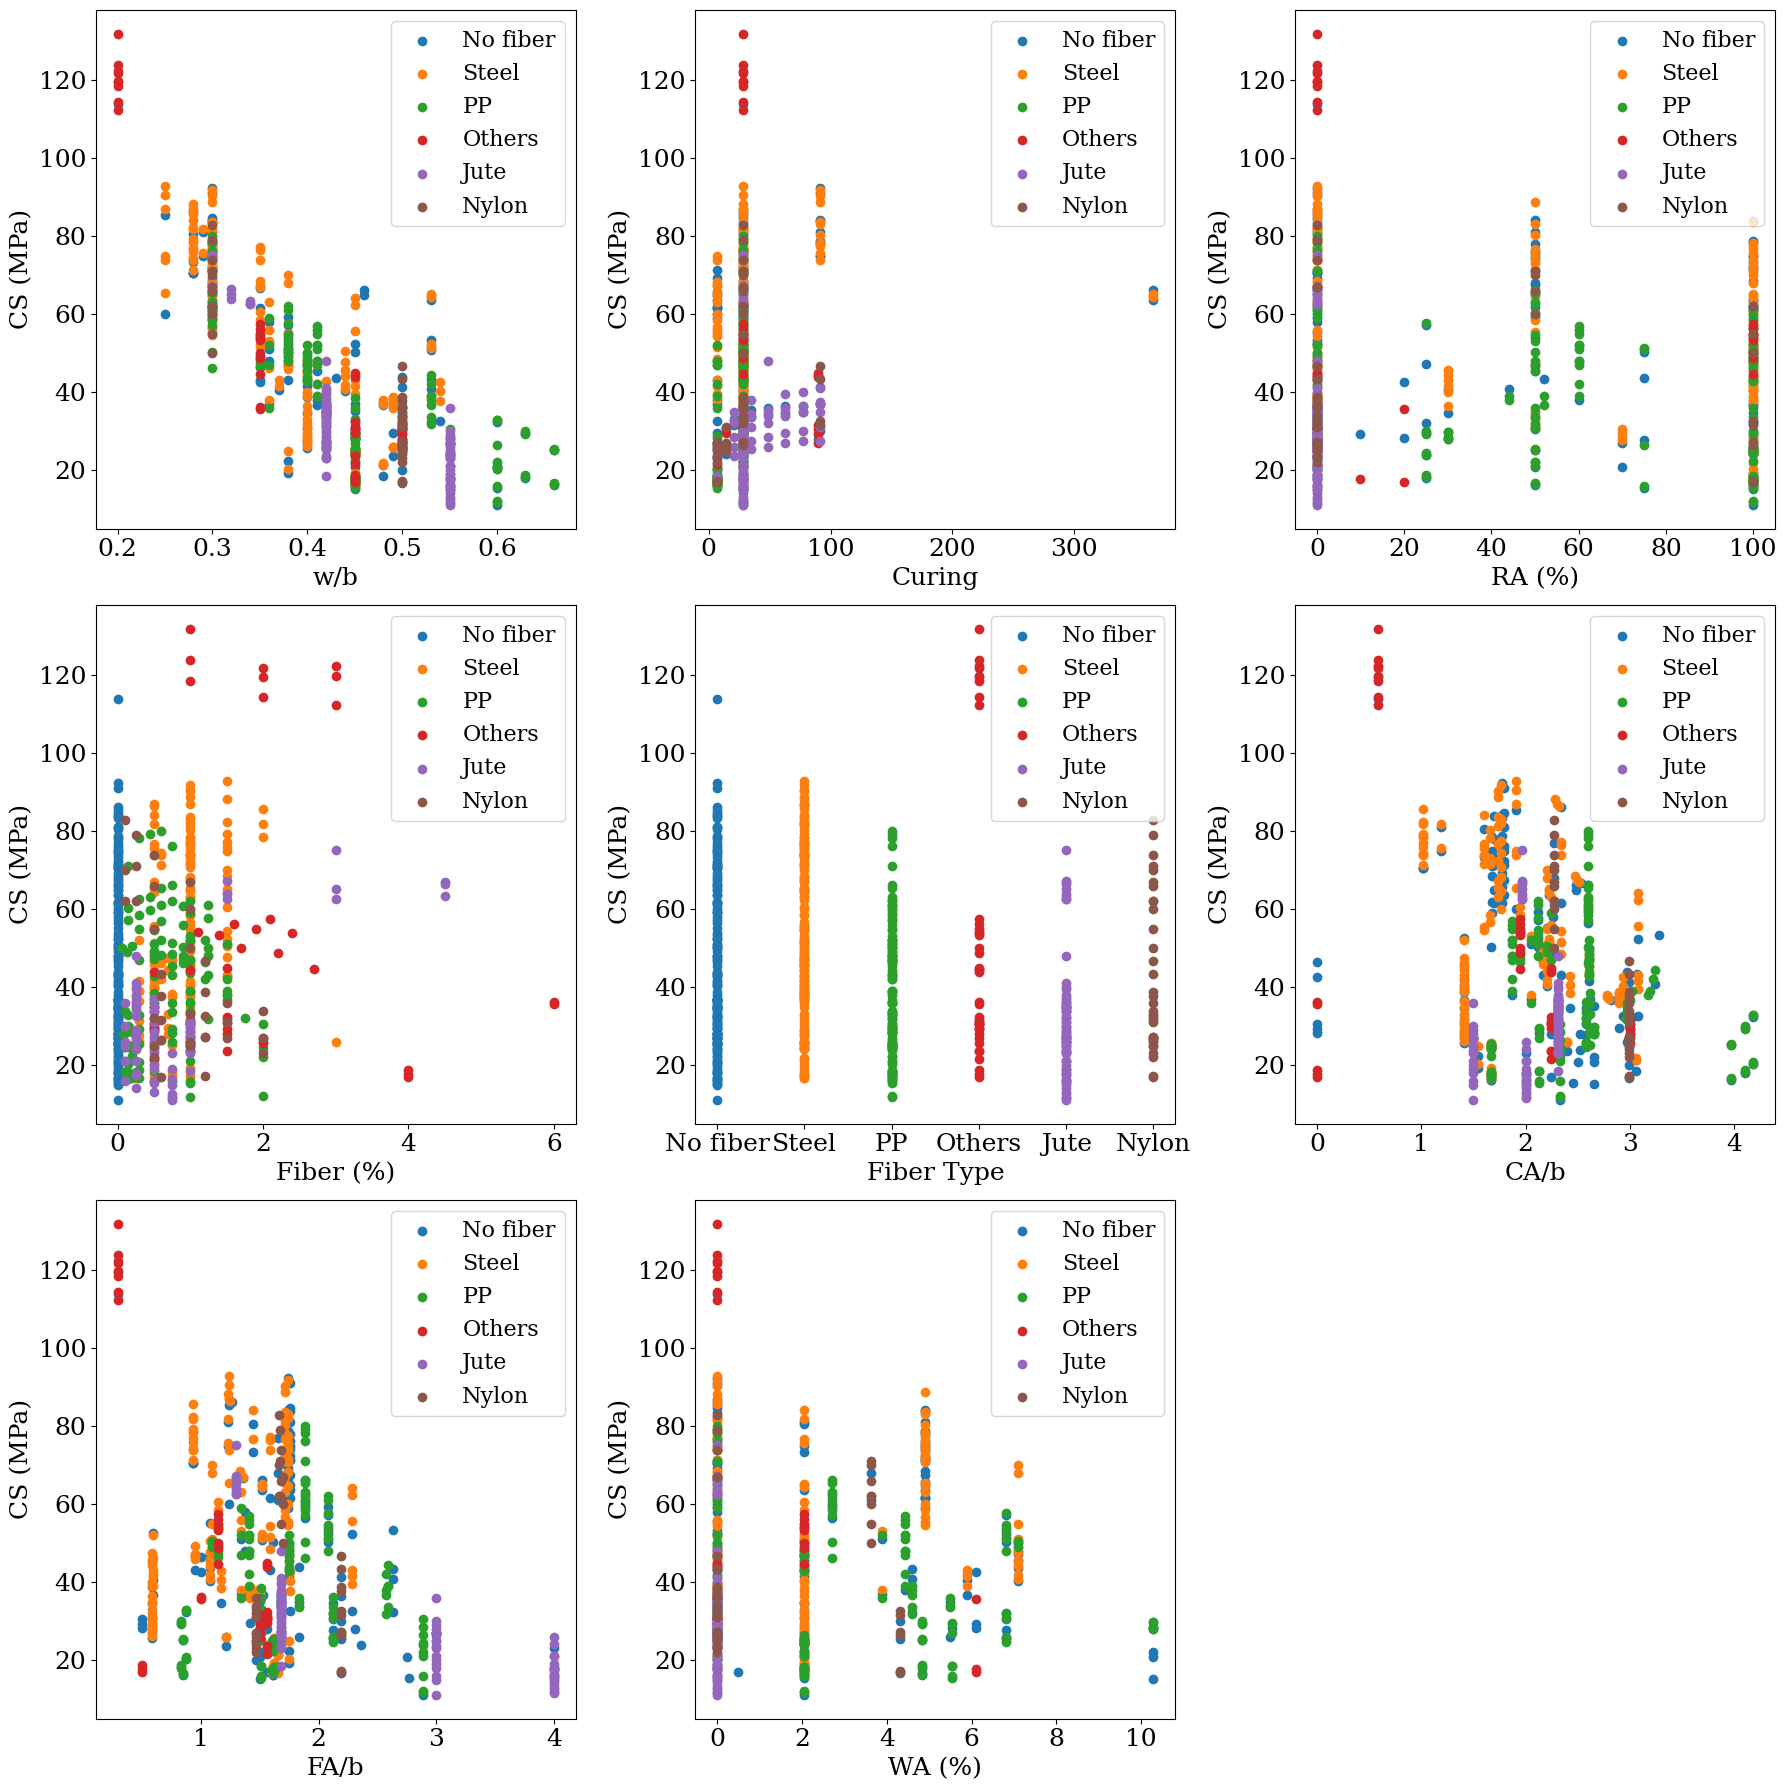

In [25]:
import math
import matplotlib.pyplot as plt

plt.rcParams['font.family'] = 'serif'  # This uses a generic serif font

# Calculate fiber counts
fiber_counts = df_rabiul['Fiber Type'].value_counts()

# Keep top five fiber types
top_five_fibers = fiber_counts.head(5).index.tolist()

# Replace other fiber types with 'Others'
df_rabiul['Fiber Type'] = df_rabiul['Fiber Type'].apply(lambda x: x if x in top_five_fibers else 'Others')

# Determine the number of rows and columns for subplots
num_plots = len(df_rabiul.columns) - 1  # Excluding 'CS (MPa)' column
num_cols = 3  # Three columns for triple column layout
num_rows = math.ceil(num_plots / num_cols)

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(18, 6 * num_rows))

# Flatten the axes if there is only one row
if num_rows == 1:
    axes = axes.reshape(1, -1)

# Iterate over each feature and create scatter plot against 'CS (MPa)'
for i, (feature, ax) in enumerate(zip(df_rabiul.columns[:-1], axes.flatten())):
    for fiber_type in df_rabiul['Fiber Type'].unique():
        subset = df_rabiul[df_rabiul['Fiber Type'] == fiber_type]
        ax.scatter(subset[feature], subset['CS (MPa)'], label=fiber_type)
    ax.set_xlabel(feature, fontsize=18)
    ax.set_ylabel('CS (MPa)', fontsize=18)
    ax.tick_params(axis='both', which='major', labelsize=18)
    ax.legend(fontsize=16)

# Remove any blank subplots
for i in range(num_plots, num_rows * num_cols):
    fig.delaxes(axes.flatten()[i])

plt.tight_layout()

#plt.savefig('distribution of cs-final_2.0.png', dpi=1000)


# Correlation

In [26]:
df.shape

(634, 15)

<Axes: >

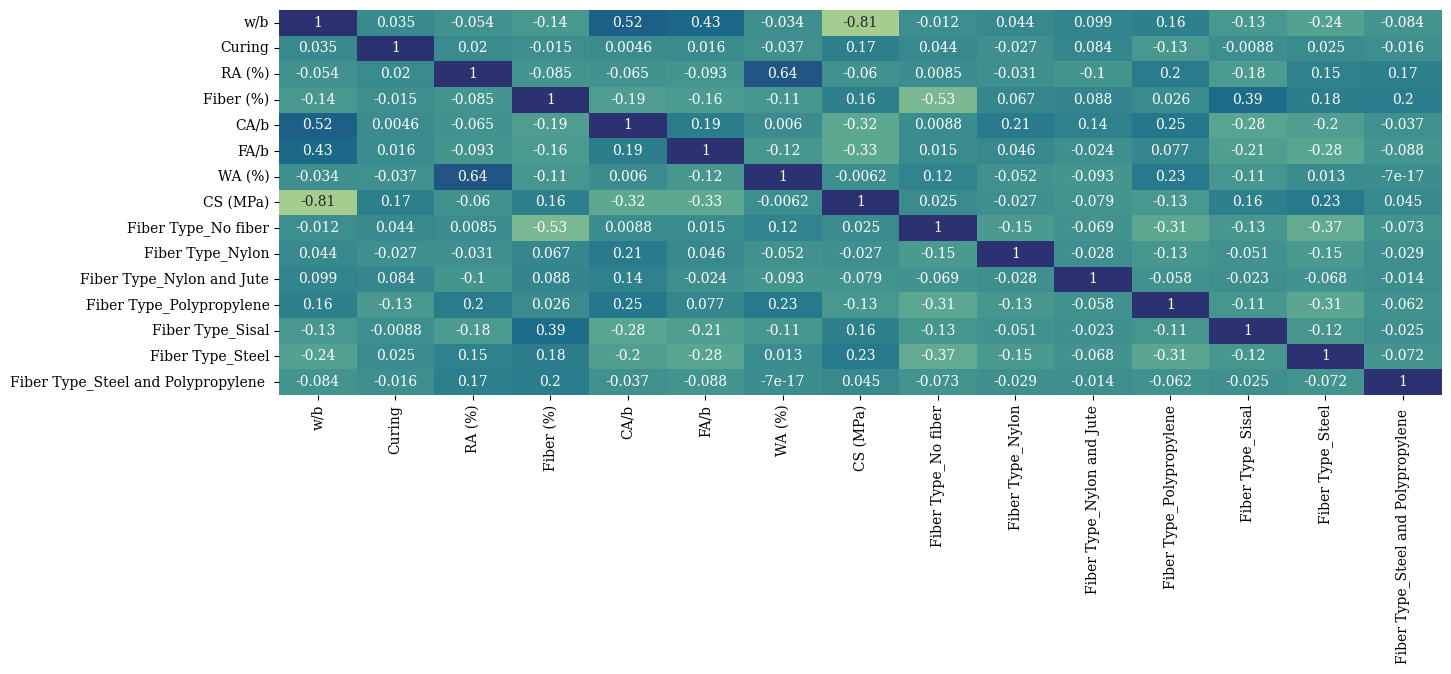

In [27]:
plt.figure(figsize=(15, 5))
sns.heatmap(df.corr(),annot = True, cbar=False, cmap="crest")

<Axes: >

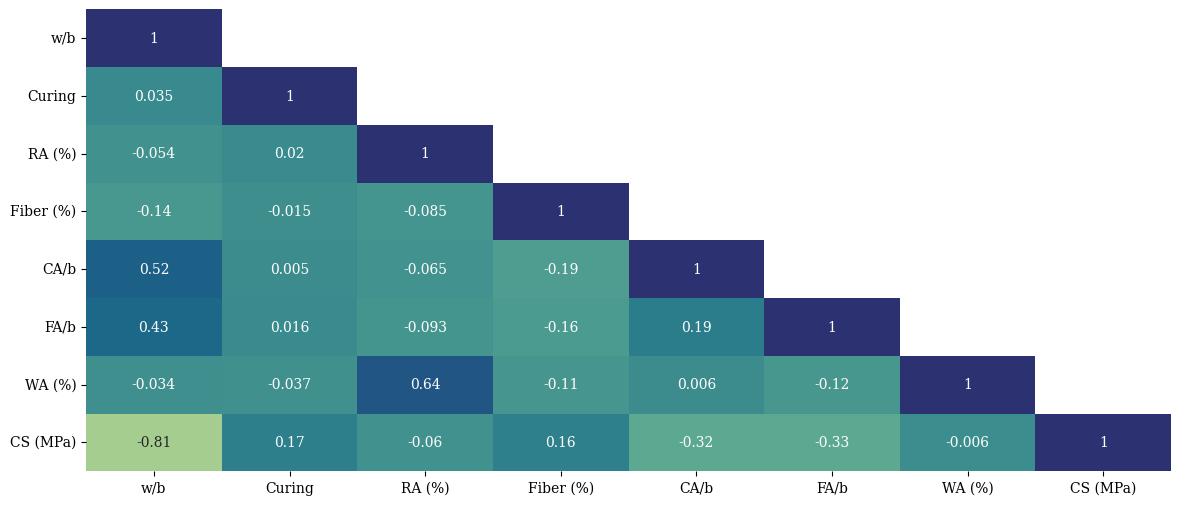

In [28]:
plt.rcParams['font.family'] = 'serif'  # This uses a generic serif font

# Define the features you want to include in the correlation matrix
selected_features = ['w/b', 'Curing', 'RA (%)', 'Fiber (%)', 'CA/b', 'FA/b', 'WA (%)', 'CS (MPa)']

# Create a subset DataFrame with only the selected features
subset_df = df[selected_features]

# Compute the correlation matrix
corr_matrix = subset_df.corr().round(3)

# Create a mask to hide the upper triangle
mask = np.triu(np.ones_like(corr_matrix, dtype=bool), k=1)

# Plot the correlation heatmap with triangular mask
plt.figure(figsize=(14, 6))  # Adjust the figure size as needed
sns.heatmap(corr_matrix, annot=True, cmap="crest", mask=mask, cbar=False)

#plt.savefig('corr plot.png', dpi=600)

In [29]:
rabiul=subset_df.corr()
#rabiul.round(3).to_excel("feature importance.xlsx")

# Dataset Spliting & Scaling

In [30]:
X = df.drop('CS (MPa)', axis = 1)
y = df['CS (MPa)']

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Model with hyper parameter tuning

### Fold

In [77]:
fold = KFold(n_splits=10, shuffle=True)
fold2 = KFold(n_splits=5, shuffle=True, random_state=42)

## Trest set

### List

In [78]:
r2_l = []
adjr = []
mse_l = []
mae_l = []
rmse_l = []
cross_l = []


#### Linear Regression

In [79]:
param_grid_lr = {
    'fit_intercept': [True, False],
    'positive': [True, False]
                }

grid_lr = GridSearchCV(
    estimator = LinearRegression(),
    param_grid = param_grid_lr,
    cv = fold2,
    n_jobs=-1,
    verbose=1,
        )

grid_lr.fit(X_train, y_train)
pred_lr_test = grid_lr.predict(X_test)
r2_grid_lr = round(r2_score(y_test, pred_lr_test), 4)

cross_grid_lr = cross_val_score(grid_lr, StandardScaler().fit_transform(X), y, cv = fold, n_jobs=-1)
adjusted_r2_grid_lr = 1 - ((1-r2_grid_lr)*(X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
mse_grid_lr = round((mean_squared_error(y_test, pred_lr_test)), 2)
mae_grid_lr = round((mean_absolute_error(y_test, pred_lr_test)), 2)
rmse_grid_lr = round(mse_grid_lr ** 0.5,2)
cross_mean_grid_lr = cross_grid_lr.mean()

r2_l.append(r2_grid_lr)
adjr.append(adjusted_r2_grid_lr)
mse_l.append(mse_grid_lr)
mae_l.append(mae_grid_lr)
rmse_l.append(rmse_grid_lr)
cross_l.append(cross_mean_grid_lr)

print('R2_score :',r2_grid_lr)
print('corss:', cross_mean_grid_lr)
print('Adjusted r2:',adjusted_r2_grid_lr)
print('MSE :',mse_grid_lr)
print('MAE :',mae_grid_lr)
print('rmse',rmse_grid_lr)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
R2_score : 0.7515
corss: 0.7292036072770688
Adjusted r2: 0.7204375
MSE : 126.19
MAE : 8.53
rmse 11.23


In [80]:
grid_lr.best_params_  # Linear Regression

{'fit_intercept': True, 'positive': False}

#### Ridge Regression

In [81]:
param_grid_rr = {
    'alpha': [0.01, 0.1, 1.0, 10.0],
    'fit_intercept': [True, False],
    'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']
}

grid_rr = GridSearchCV(
    estimator = Ridge(),
    param_grid = param_grid_rr,
    cv = fold2,
    n_jobs=-1,
    verbose=1,
        )

grid_rr.fit(X_train, y_train)
pred_rr_test = grid_rr.predict(X_test)
r2_grid_rr = round(r2_score(y_test, pred_rr_test), 4)

cross_grid_rr = cross_val_score(grid_rr, StandardScaler().fit_transform(X), y, cv = fold, n_jobs=-1)
adjusted_r2_grid_rr = 1 - ((1-r2_grid_rr)*(X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
mse_grid_rr = round((mean_squared_error(y_test, pred_rr_test)), 2)
mae_grid_rr = round((mean_absolute_error(y_test, pred_rr_test)), 2)
rmse_grid_rr = round(mse_grid_rr ** 0.5,2)
cross_mean_grid_rr = cross_grid_rr.mean()

r2_l.append(r2_grid_rr)
adjr.append(adjusted_r2_grid_rr)
mse_l.append(mse_grid_rr)
mae_l.append(mae_grid_rr)
rmse_l.append(rmse_grid_rr)
cross_l.append(cross_mean_grid_rr)


print('R2_score :',r2_grid_rr)
print('corss:', cross_mean_grid_rr)
print('Adjusted r2:',adjusted_r2_grid_rr)
print('MSE :',mse_grid_rr)
print('MAE :',mae_grid_rr)
print('rmse',rmse_grid_rr)

Fitting 5 folds for each of 56 candidates, totalling 280 fits
R2_score : 0.7521
corss: 0.7348934024607654
Adjusted r2: 0.7211125
MSE : 125.91
MAE : 8.53
rmse 11.22


In [82]:
grid_rr.best_params_ # Ridge Reg.

{'alpha': 1.0, 'fit_intercept': True, 'solver': 'saga'}

#### Lasso Regression

In [83]:
param_grid_lasso_r = {
    'alpha': [0.01, 0.1, 1.0, 10.0],
    'fit_intercept': [True, False],
    'selection': ['cyclic', 'random']
}

grid_lasso_r = GridSearchCV(
    estimator = Lasso(),
    param_grid = param_grid_lasso_r,
    cv = fold2,
    n_jobs=-1,
    verbose=1,
        )

grid_lasso_r.fit(X_train, y_train)
pred_lasso_test = grid_lasso_r.predict(X_test)
r2_grid_lasso_r = round(r2_score(y_test, pred_lasso_test), 4)

cross_grid_lasso_r = cross_val_score(grid_lasso_r, StandardScaler().fit_transform(X), y, cv = fold, n_jobs=-1)
adjusted_r2_grid_lasso_r = 1 - ((1-r2_grid_lasso_r)*(X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
mse_grid_lasso_r = round((mean_squared_error(y_test, pred_lasso_test)), 2)
mae_grid_lasso_r = round((mean_absolute_error(y_test, pred_lasso_test)), 2)
rmse_grid_lasso_r = round(mse_grid_lasso_r ** 0.5,2)
cross_mean_grid_lasso_r = cross_grid_lasso_r.mean()

r2_l.append(r2_grid_lasso_r)
adjr.append(adjusted_r2_grid_lasso_r)
mse_l.append(mse_grid_lasso_r)
mae_l.append(mae_grid_lasso_r)
rmse_l.append(rmse_grid_lasso_r)
cross_l.append(cross_mean_grid_lasso_r)


print('R2_score :',r2_grid_lasso_r)
print('corss:', cross_mean_grid_lasso_r)
print('Adjusted r2:',adjusted_r2_grid_lasso_r)
print('MSE :',mse_grid_lasso_r)
print('MAE :',mae_grid_lasso_r)
print('rmse',rmse_grid_lasso_r)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
R2_score : 0.7559
corss: 0.7411443744917723
Adjusted r2: 0.7253875000000001
MSE : 123.96
MAE : 8.54
rmse 11.13


In [84]:
grid_lasso_r.best_params_ # Lasso Reg.

{'alpha': 0.1, 'fit_intercept': True, 'selection': 'random'}

#### Support Vector Machine

In [85]:
param_grid_svr = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto'],
}

grid_svr = GridSearchCV(
    estimator = SVR(),
    param_grid = param_grid_svr,
    cv = fold2,
    n_jobs=-1,
    verbose=1,
        )

grid_svr.fit(X_train, y_train)
pred_svr_test = grid_svr.predict(X_test)
r2_grid_svr = round(r2_score(y_test, pred_svr_test), 4)

cross_grid_svr = cross_val_score(grid_svr, StandardScaler().fit_transform(X), y, cv = fold, n_jobs=-1)
adjusted_r2_grid_svr = 1 - ((1-r2_grid_svr)*(X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
mse_grid_svr = round((mean_squared_error(y_test, pred_svr_test)), 2)
mae_grid_svr = round((mean_absolute_error(y_test, pred_svr_test)), 2)
rmse_grid_svr = round(mse_grid_svr ** 0.5,2)
cross_mean_grid_svr = cross_grid_svr.mean()

r2_l.append(r2_grid_svr)
adjr.append(adjusted_r2_grid_svr)
mse_l.append(mse_grid_svr)
mae_l.append(mae_grid_svr)
rmse_l.append(rmse_grid_svr)
cross_l.append(cross_mean_grid_svr)

print('R2_score :',r2_grid_svr)
print('corss:', cross_mean_grid_svr)
print('Adjusted r2:',adjusted_r2_grid_svr)
print('MSE :',mse_grid_svr)
print('MAE :',mae_grid_svr)
print('rmse',rmse_grid_svr)


Fitting 5 folds for each of 24 candidates, totalling 120 fits
R2_score : 0.9433
corss: 0.8992918959341131
Adjusted r2: 0.9362125
MSE : 28.77
MAE : 3.61
rmse 5.36


In [86]:
grid_svr.best_params_ #Support Vector

{'C': 100, 'gamma': 'scale', 'kernel': 'rbf'}

#### K Nearest Neighbor

In [87]:
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'leaf_size': [10, 20, 30, 40],
    'p': [1, 2],
    'metric': ['euclidean', 'manhattan']
}

grid_knn = GridSearchCV(
    estimator = KNeighborsRegressor(),
    param_grid = param_grid_knn,
    cv = fold2,
    n_jobs=-1,
    verbose=1,
        )

grid_knn.fit(X_train, y_train)
pred_knn_test = grid_knn.predict(X_test)
r2_grid_knn = round(r2_score(y_test, pred_knn_test), 4)

cross_grid_knn = cross_val_score(grid_knn, StandardScaler().fit_transform(X), y, cv = fold, n_jobs=-1)
adjusted_r2_grid_knn = 1 - ((1-r2_grid_knn)*(X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
mse_grid_knn = round((mean_squared_error(y_test, pred_knn_test)), 2)
mae_grid_knn = round((mean_absolute_error(y_test, pred_knn_test)), 2)
rmse_grid_knn = round(mse_grid_knn ** 0.5,2)
cross_mean_grid_knn = cross_grid_knn.mean()

r2_l.append(r2_grid_knn)
adjr.append(adjusted_r2_grid_knn)
mse_l.append(mse_grid_knn)
mae_l.append(mae_grid_knn)
rmse_l.append(rmse_grid_knn)
cross_l.append(cross_mean_grid_knn)

print('R2_score :',r2_grid_knn)
print('corss:', cross_mean_grid_knn)
print('Adjusted r2:',adjusted_r2_grid_knn)
print('MSE :',mse_grid_knn)
print('MAE :',mae_grid_knn)
print('rmse',rmse_grid_knn)


Fitting 5 folds for each of 512 candidates, totalling 2560 fits
R2_score : 0.9428
corss: 0.8567095889182307
Adjusted r2: 0.93565
MSE : 29.05
MAE : 3.86
rmse 5.39


In [88]:
grid_knn.best_params_ # KNN

{'algorithm': 'auto',
 'leaf_size': 20,
 'metric': 'manhattan',
 'n_neighbors': 3,
 'p': 1,
 'weights': 'distance'}

#### Decision Tree

In [89]:
param_grid_dt = {
    'criterion': ['squared_error', 'poisson'],
    'splitter': ['best', 'random'],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_leaf_nodes': [None, 10, 20, 30],
    'random_state': [42]
}

grid_dt = GridSearchCV(
    estimator = DecisionTreeRegressor(),
    param_grid = param_grid_dt,
    cv = fold2,
    n_jobs=-1,
    verbose=1,
        )

grid_dt.fit(X_train, y_train)
pred_dt_test = grid_dt.predict(X_test)
r2_grid_dt = round(r2_score(y_test, pred_dt_test), 4)

cross_grid_dt = cross_val_score(grid_dt, StandardScaler().fit_transform(X), y, cv = fold, n_jobs=-1)
adjusted_r2_grid_dt = 1 - ((1-r2_grid_dt)*(X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
mse_grid_dt = round((mean_squared_error(y_test, pred_dt_test)), 2)
mae_grid_dt = round((mean_absolute_error(y_test, pred_dt_test)), 2)
rmse_grid_dt = round(mse_grid_dt ** 0.5,2)
cross_mean_grid_dt = cross_grid_dt.mean()

r2_l.append(r2_grid_dt)
adjr.append(adjusted_r2_grid_dt)
mse_l.append(mse_grid_dt)
mae_l.append(mae_grid_dt)
rmse_l.append(rmse_grid_dt)
cross_l.append(cross_mean_grid_dt)

print('R2_score :',r2_grid_dt)
print('corss:', cross_mean_grid_dt)
print('Adjusted r2:',adjusted_r2_grid_dt)
print('MSE :',mse_grid_dt)
print('MAE :',mae_grid_dt)
print('rmse',rmse_grid_dt)


Fitting 5 folds for each of 1728 candidates, totalling 8640 fits


C:\Users\mhrab\anaconda3\envs\MLprojects\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
2880 fits failed out of a total of 8640.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
2880 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\mhrab\anaconda3\envs\MLprojects\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\mhrab\anaconda3\envs\MLprojects\Lib\site-packages\sklearn\base.py", line 1467, in wrapper
    estimator._validate_params()
  File "C:\Users\mhrab\anaconda3\envs\MLprojects\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_para

R2_score : 0.9454
corss: 0.8807056044937877
Adjusted r2: 0.938575
MSE : 27.75
MAE : 3.76
rmse 5.27


In [90]:
grid_dt.best_params_ # Decision Tree

{'criterion': 'squared_error',
 'max_depth': 20,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'random_state': 42,
 'splitter': 'best'}

#### Random Forest

In [91]:
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_features' : ['auto', 'sqrt','log2'],
    # 'max_depth':[10, 20, 30],
    'min_samples_split' :[2, 5, 10],
    'min_samples_leaf' :[1, 2, 4]
}
grid_rf = GridSearchCV(
    estimator = RandomForestRegressor(),
    param_grid = param_grid_rf,
    cv = fold2,
    n_jobs=-1,
    verbose=1,
)

grid_rf.fit(X_train, y_train)
pred_rf_test = grid_rf.predict(X_test)
r2_grid_rf = round(r2_score(y_test, pred_rf_test), 4)

cross_grid_rf = cross_val_score(grid_rf, StandardScaler().fit_transform(X), y, cv = fold, n_jobs=-1)
adjusted_r2_grid_rf = 1 - ((1-r2_grid_rf)*(X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
mse_grid_rf = round((mean_squared_error(y_test, pred_rf_test)), 2)
mae_grid_rf = round((mean_absolute_error(y_test, pred_rf_test)), 2)
rmse_grid_rf = round(mse_grid_rf ** 0.5,2)
cross_mean_grid_rf = cross_grid_rf.mean()

r2_l.append(r2_grid_rf)
adjr.append(adjusted_r2_grid_rf)
mse_l.append(mse_grid_rf)
mae_l.append(mae_grid_rf)
rmse_l.append(rmse_grid_rf)
cross_l.append(cross_mean_grid_rf)

print('R2_score :',r2_grid_rf)
print('corss:', cross_mean_grid_rf)
print('Adjusted r2:',adjusted_r2_grid_rf)
print('MSE :',mse_grid_rf)
print('MAE :',mae_grid_rf)
print('rmse',rmse_grid_rf)

Fitting 5 folds for each of 81 candidates, totalling 405 fits


C:\Users\mhrab\anaconda3\envs\MLprojects\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
135 fits failed out of a total of 405.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
135 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\mhrab\anaconda3\envs\MLprojects\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\mhrab\anaconda3\envs\MLprojects\Lib\site-packages\sklearn\base.py", line 1467, in wrapper
    estimator._validate_params()
  File "C:\Users\mhrab\anaconda3\envs\MLprojects\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_paramet

R2_score : 0.9563
corss: 0.9394744694824533
Adjusted r2: 0.9508375
MSE : 22.21
MAE : 3.42
rmse 4.71


In [92]:
grid_rf.best_params_ # Random Forest

{'max_features': 'log2',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 300}

#### AdaBoost

In [93]:
param_grid_ab = {
    'n_estimators': [50, 100, 150, 200],
    'learning_rate': [0.01, 0.1, 1.0],
    'random_state': [40, 42, 72]
}

grid_ab = GridSearchCV(
    estimator = AdaBoostRegressor(),
    param_grid = param_grid_ab,
    cv = fold2,
    n_jobs=-1,
    verbose=1,
)

grid_ab.fit(X_train, y_train)
pred_ab_test = grid_ab.predict(X_test)
r2_grid_ab = round(r2_score(y_test, pred_ab_test), 4)

cross_grid_ab = cross_val_score(grid_ab, StandardScaler().fit_transform(X), y, cv = fold, n_jobs=-1)
adjusted_r2_grid_ab = 1 - ((1-r2_grid_ab)*(X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
mse_grid_ab = round((mean_squared_error(y_test, pred_ab_test)), 2)
mae_grid_ab = round((mean_absolute_error(y_test, pred_ab_test)), 2)
rmse_grid_ab = round(mse_grid_ab ** 0.5,2)
cross_mean_grid_ab = cross_grid_ab.mean()

r2_l.append(r2_grid_ab)
adjr.append(adjusted_r2_grid_ab)
mse_l.append(mse_grid_ab)
mae_l.append(mae_grid_ab)
rmse_l.append(rmse_grid_ab)
cross_l.append(cross_mean_grid_ab)

print('R2_score :',r2_grid_ab)
print('corss:', cross_mean_grid_ab)
print('Adjusted r2:',adjusted_r2_grid_ab)
print('MSE :',mse_grid_ab)
print('MAE :',mae_grid_ab)
print('rmse',rmse_grid_ab)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
R2_score : 0.8856
corss: 0.863589229715281
Adjusted r2: 0.8713000000000001
MSE : 58.08
MAE : 6.26
rmse 7.62


In [94]:
grid_ab.best_params_ #Adaboost

{'learning_rate': 1.0, 'n_estimators': 200, 'random_state': 40}

#### XGBoost

In [95]:
param_grid_xgb = {
        "learning_rate"    : [0.05, 0.001, 0.10, 0.15 ] ,
        "max_depth"        : [ 3, 4, 5, 6],
        "min_child_weight" : [ 1, 3, 7 ],
        "gamma"            : [ 0.0, 0.1, 0.2],
        "colsample_bytree" : [ 0.2, 0.3, 0.4]
}

grid_xgb = GridSearchCV(
    estimator = XGBRegressor(),
    param_grid = param_grid_xgb,
    cv = fold2,
    n_jobs=-1,
    verbose=1,
)

grid_xgb.fit(X_train, y_train)
pred_xgb_test = grid_xgb.predict(X_test)
r2_grid_xgb = round(r2_score(y_test, pred_xgb_test), 4)

cross_grid_xgb = cross_val_score(grid_xgb, StandardScaler().fit_transform(X), y, cv = fold, n_jobs=-1)
adjusted_r2_grid_xgb = 1 - ((1-r2_grid_xgb)*(X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
mse_grid_xgb = round((mean_squared_error(y_test, pred_xgb_test)), 2)
mae_grid_xgb = round((mean_absolute_error(y_test, pred_xgb_test)), 2)
rmse_grid_xgb = round(mse_grid_xgb ** 0.5,2)
cross_mean_grid_xgb = cross_grid_xgb.mean()

r2_l.append(r2_grid_xgb)
adjr.append(adjusted_r2_grid_xgb)
mse_l.append(mse_grid_xgb)
mae_l.append(mae_grid_xgb)
rmse_l.append(rmse_grid_xgb)
cross_l.append(cross_mean_grid_xgb)

print('R2_score :',r2_grid_xgb)
print('corss:', cross_mean_grid_xgb)
print('Adjusted r2:',adjusted_r2_grid_xgb)
print('MSE :',mse_grid_xgb)
print('MAE :',mae_grid_xgb)
print('rmse',rmse_grid_xgb)

Fitting 5 folds for each of 432 candidates, totalling 2160 fits
R2_score : 0.9696
corss: 0.9634774405996287
Adjusted r2: 0.9658
MSE : 15.46
MAE : 2.71
rmse 3.93


In [96]:
grid_xgb.best_params_ # xgboost

{'colsample_bytree': 0.4,
 'gamma': 0.1,
 'learning_rate': 0.15,
 'max_depth': 6,
 'min_child_weight': 1}

#### CatBoost

In [99]:
param_grid_cat = {"n_estimators":[50,100,150, 200],
               "random_state":[0,42,50],
               "learning_rate":[0.05, 0.02, 0.01, 0.1,0.3,0.5]
               }

grid_cat = GridSearchCV(
    estimator = CatBoostRegressor(),
    param_grid = param_grid_cat,
    cv = fold2,
    n_jobs=-1,
    verbose=1,
)

grid_cat.fit(X_train, y_train)
pred_cat_test = grid_cat.predict(X_test)
r2_grid_cat = round(r2_score(y_test, pred_cat_test), 4)

cross_grid_cat = cross_val_score(grid_cat, StandardScaler().fit_transform(X), y, cv = fold, n_jobs=-1)
adjusted_r2_grid_cat = 1 - ((1-r2_grid_cat)*(X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
mse_grid_cat = round((mean_squared_error(y_test, pred_cat_test)), 2)
mae_grid_cat = round((mean_absolute_error(y_test, pred_cat_test)), 2)
rmse_grid_cat = round(mse_grid_cat ** 0.5,2)
cross_mean_grid_cat = cross_grid_cat.mean()

r2_l.append(r2_grid_cat)
adjr.append(adjusted_r2_grid_cat)
mse_l.append(mse_grid_cat)
mae_l.append(mae_grid_cat)
rmse_l.append(rmse_grid_cat)
cross_l.append(cross_mean_grid_cat)

print('R2_score :',r2_grid_cat)
print('corss:', cross_mean_grid_cat)
print('Adjusted r2:',adjusted_r2_grid_cat)
print('MSE :',mse_grid_cat)
print('MAE :',mae_grid_cat)
print('rmse',rmse_grid_cat)

Fitting 5 folds for each of 72 candidates, totalling 360 fits
0:	learn: 17.6512637	total: 2.94ms	remaining: 584ms
1:	learn: 14.9275174	total: 5.78ms	remaining: 572ms
2:	learn: 12.7752686	total: 7.89ms	remaining: 518ms
3:	learn: 11.3504145	total: 8.89ms	remaining: 436ms
4:	learn: 9.9722651	total: 12.1ms	remaining: 473ms
5:	learn: 8.9830082	total: 14.3ms	remaining: 461ms
6:	learn: 8.2879034	total: 16.6ms	remaining: 458ms
7:	learn: 7.7105099	total: 20.4ms	remaining: 488ms
8:	learn: 7.3731101	total: 22.6ms	remaining: 479ms
9:	learn: 7.0573738	total: 24.9ms	remaining: 473ms
10:	learn: 6.7148352	total: 27.1ms	remaining: 466ms
11:	learn: 6.5276522	total: 29.2ms	remaining: 458ms
12:	learn: 6.1934602	total: 31.3ms	remaining: 450ms
13:	learn: 6.0429724	total: 33.5ms	remaining: 445ms
14:	learn: 5.8790915	total: 35.9ms	remaining: 443ms
15:	learn: 5.7878206	total: 38.2ms	remaining: 440ms
16:	learn: 5.6207076	total: 40.2ms	remaining: 432ms
17:	learn: 5.5126173	total: 41.9ms	remaining: 423ms
18:	lear

R2_score : 0.9707
corss: 0.9628339750132195
Adjusted r2: 0.9670375
MSE : 14.87
MAE : 2.64
rmse 3.86


In [100]:
grid_cat.best_params_ # Catboost

{'learning_rate': 0.3, 'n_estimators': 200, 'random_state': 42}

#### LGBM

In [101]:
param_gird_lgbm = {"min_data_in_leaf":[20, 30, 40],
              "n_estimators":[ 350, 400, 450, ],
               "max_depth":[3, 4, 5],
               "learning_rate":[0.05, 0.01, 0.1, ]}


grid_lgbm = GridSearchCV(
    estimator = LGBMRegressor(),
    param_grid = param_gird_lgbm,
    cv = fold2,
    n_jobs=-1,
    verbose=1,
)

grid_lgbm.fit(X_train, y_train)
pred_lgbm_test = grid_lgbm.predict(X_test)
r2_grid_lgbm = round(r2_score(y_test, pred_lgbm_test), 4)

cross_grid_lgbm = cross_val_score(grid_lgbm, StandardScaler().fit_transform(X), y, cv = fold, n_jobs=-1)
adjusted_r2_grid_lgbm = 1 - ((1-r2_grid_lgbm)*(X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
mse_grid_lgbm = round((mean_squared_error(y_test, pred_lgbm_test)), 2)
mae_grid_lgbm = round((mean_absolute_error(y_test, pred_lgbm_test)), 2)
rmse_grid_lgbm = round(mse_grid_lgbm ** 0.5,2)
cross_mean_grid_lgbm = cross_grid_lgbm.mean()

r2_l.append(r2_grid_lgbm)
adjr.append(adjusted_r2_grid_lgbm)
mse_l.append(mse_grid_lgbm)
mae_l.append(mae_grid_lgbm)
rmse_l.append(rmse_grid_lgbm)
cross_l.append(cross_mean_grid_lgbm)

print('R2_score :',r2_grid_lgbm)
print('corss:', cross_mean_grid_lgbm)
print('Adjusted r2:',adjusted_r2_grid_lgbm)
print('MSE :',mse_grid_lgbm)
print('MAE :',mae_grid_lgbm)
print('rmse',rmse_grid_lgbm)

Fitting 5 folds for each of 81 candidates, totalling 405 fits
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001177 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 204
[LightGBM] [Info] Number of data points in the train set: 507, number of used features: 11
[LightGBM] [Info] Start training from score 44.628008
[LightGBM] [Warning] No furthe

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
R2_score : 0.9724
corss: 0.9622741257075313
Adjusted r2: 0.9689500000000001
MSE : 14.04
MAE : 2.76
rmse 3.75


In [102]:
grid_lgbm.best_params_ #lgbm

{'learning_rate': 0.1,
 'max_depth': 5,
 'min_data_in_leaf': 20,
 'n_estimators': 450}

#### Score Data Frame

In [221]:
model = ['LR', 'RR', 'Lasso', 'SVM', 'KNN','DT','RF','AB','XGB','CB','LGBM']

table = pd.DataFrame({
    'Algorithm':model,
    'R-Square':r2_l,
    'Adjusted R-Square':adjr,
    'MSE': mse_l,
    'MAE': mae_l,
    'RMSE': rmse_l
})

table

ValueError: All arrays must be of the same length

### For Training

In [ ]:
#xtrain, xtest, ytrain, ytest = train_test_split(X_train, y_train, test_size=0.2, shuffle=True)

In [104]:
r2_l2 = []
adjr2 = []
mse_l2 = []
mae_l2 = []
rmse_l2 = []
cross_l2 = []

#### Linear Regression

In [105]:
#grid_lr.fit(xtrain, ytrain)
pred_lr_train = grid_lr.predict(X_train)
r2_grid_lr = round(r2_score(y_train, pred_lr_train), 4)

#cross_grid_lr = cross_val_score(grid_lr, X, y, cv = fold, n_jobs=-1)    #StandardScaler().fit_transform(X)
adjusted_r2_grid_lr = round( 1 - ((1-r2_grid_lr)*(X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1)), 4)
mse_grid_lr = round((mean_squared_error(y_train, pred_lr_train)), 2)
mae_grid_lr = round((mean_absolute_error(y_train, pred_lr_train)), 2)
rmse_grid_lr = round(mse_grid_lr ** 0.5,2)
cross_mean_grid_lr = cross_grid_lr.mean()

r2_l2.append(r2_grid_lr)
adjr2.append(adjusted_r2_grid_lr)
mse_l2.append(mse_grid_lr)
mae_l2.append(mae_grid_lr)
rmse_l2.append(rmse_grid_lr)
#cross_l2.append(cross_mean_grid_lr)

print('R2_score :',r2_grid_lr)
#print('corss:', cross_mean_grid_lr)
print('Adjusted r2:',adjusted_r2_grid_lr)
print('MSE :',mse_grid_lr)
print('MAE :',mae_grid_lr)
print('rmse',rmse_grid_lr)

R2_score : 0.7628
Adjusted r2: 0.7561
MSE : 113.76
MAE : 8.15
rmse 10.67


#### Ridge Regression

In [106]:
#grid_rr.fit(xtrain, ytrain)
pred_rr_train = grid_rr.predict(X_train)
r2_grid_rr = round(r2_score(y_train, pred_rr_train), 4)

#cross_grid_rr = cross_val_score(grid_rr, X, y, cv = fold, n_jobs=-1)    #StandardScaler().fit_transform(X)
adjusted_r2_grid_rr = round( 1 - ((1-r2_grid_rr)*(X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1)), 4)
mse_grid_rr = round((mean_squared_error(y_train, pred_rr_train)), 2)
mae_grid_rr = round((mean_absolute_error(y_train, pred_rr_train)), 2)
rmse_grid_rr = round(mse_grid_rr ** 0.5,2)
cross_mean_grid_rr = cross_grid_rr.mean()

r2_l2.append(r2_grid_rr)
adjr2.append(adjusted_r2_grid_rr)
mse_l2.append(mse_grid_rr)
mae_l2.append(mae_grid_rr)
rmse_l2.append(rmse_grid_rr)
#cross_l2.append(cross_mean_grid_rr)

print('R2_score :',r2_grid_rr)
#print('corss:', cross_mean_grid_rr)
print('Adjusted r2:',adjusted_r2_grid_rr)
print('MSE :',mse_grid_rr)
print('MAE :',mae_grid_rr)
print('rmse',rmse_grid_rr)

R2_score : 0.7628
Adjusted r2: 0.7561
MSE : 113.77
MAE : 8.16
rmse 10.67


#### Lasso Regression

In [107]:
#grid_lasso_r.fit(xtrain, ytrain)
pred_lasso_train = grid_lasso_r.predict(X_train)
r2_grid_lasso_r = round(r2_score(y_train, pred_lasso_train), 4)

#cross_grid_lasso_r = cross_val_score(grid_lasso_r, X_train, y_train, cv = fold, n_jobs=-1)    #StandardScaler().fit_transform(X)
adjusted_r2_grid_lasso_r = round( 1 - ((1-r2_grid_lasso_r)*(X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1)), 4)
mse_grid_lasso_r = round((mean_squared_error(y_train, pred_lasso_train)), 2)
mae_grid_lasso_r = round((mean_absolute_error(y_train, pred_lasso_train)), 2)
rmse_grid_lasso_r = round(mse_grid_lasso_r ** 0.5,2)
#cross_mean_grid_lasso_r = cross_grid_lasso_r.mean()

r2_l2.append(r2_grid_lasso_r)
adjr2.append(adjusted_r2_grid_lasso_r)
mse_l2.append(mse_grid_lasso_r)
mae_l2.append(mae_grid_lasso_r)
rmse_l2.append(rmse_grid_lasso_r)
#cross_l2.append(cross_mean_grid_lasso_r)

print('R2_score :',r2_grid_lasso_r)
#print('corss:', cross_mean_grid_lasso_r)
print('Adjusted r2:',adjusted_r2_grid_lasso_r)
print('MSE :',mse_grid_lasso_r)
print('MAE :',mae_grid_lasso_r)
print('rmse',rmse_grid_lasso_r)

R2_score : 0.7614
Adjusted r2: 0.7546
MSE : 114.45
MAE : 8.28
rmse 10.7


#### Support Vector Machine

In [108]:
#grid_svr.fit(xtrain, ytrain)
pred_svr_train = grid_svr.predict(X_train)
r2_grid_svr = round(r2_score(y_train, pred_svr_train), 4)

#cross_grid_svr = cross_val_score(grid_svr, X_train, y_train, cv = fold, n_jobs=-1)    #StandardScaler().fit_transform(X)
adjusted_r2_grid_svr = round( 1 - ((1-r2_grid_svr)*(X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1)), 4)
mse_grid_svr = round((mean_squared_error(y_train, pred_svr_train)), 2)
mae_grid_svr = round((mean_absolute_error(y_train, pred_svr_train)), 2)
rmse_grid_svr = round(mse_grid_svr ** 0.5,2)
#cross_mean_grid_svr = cross_grid_svr.mean()

r2_l2.append(r2_grid_svr)
adjr2.append(adjusted_r2_grid_svr)
mse_l2.append(mse_grid_svr)
mae_l2.append(mae_grid_svr)
rmse_l2.append(rmse_grid_svr)
#cross_l2.append(cross_mean_grid_svr)

print('R2_score :',r2_grid_svr)
#print('corss:', cross_mean_grid_svr)
print('Adjusted r2:',adjusted_r2_grid_svr)
print('MSE :',mse_grid_svr)
print('MAE :',mae_grid_svr)
print('rmse',rmse_grid_svr)

R2_score : 0.9322
Adjusted r2: 0.9303
MSE : 32.5
MAE : 2.83
rmse 5.7


#### K Nearest Neighbour

In [109]:
#grid_knn.fit(xtrain, ytrain)
pred_knn_train = grid_knn.predict(X_train)
r2_grid_knn = round(r2_score(y_train, pred_knn_train), 4)

#cross_grid_knn = cross_val_score(grid_knn, X_train, y_train, cv = fold, n_jobs=-1)    #StandardScaler().fit_transform(X)
adjusted_r2_grid_knn = round( 1 - ((1-r2_grid_knn)*(X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1)), 4)
mse_grid_knn = round((mean_squared_error(y_train, pred_knn_train)), 2)
mae_grid_knn = round((mean_absolute_error(y_train, pred_knn_train)), 2)
rmse_grid_knn = round(mse_grid_knn ** 0.5,2)
#cross_mean_grid_knn = cross_grid_knn.mean()

r2_l2.append(r2_grid_knn)
adjr2.append(adjusted_r2_grid_knn)
mse_l2.append(mse_grid_knn)
mae_l2.append(mae_grid_knn)
rmse_l2.append(rmse_grid_knn)
#cross_l2.append(cross_mean_grid_knn)

print('R2_score :',r2_grid_knn)
#print('corss:', cross_mean_grid_knn)
print('Adjusted r2:',adjusted_r2_grid_knn)
print('MSE :',mse_grid_knn)
print('MAE :',mae_grid_knn)
print('rmse',rmse_grid_knn)

R2_score : 0.9966
Adjusted r2: 0.9965
MSE : 1.63
MAE : 0.38
rmse 1.28


#### Decision Tree

In [110]:
#grid_dt.fit(xtrain, ytrain)
pred_dt_train = grid_dt.predict(X_train)
r2_grid_dt = round(r2_score(y_train, pred_dt_train), 4)

#cross_grid_dt = cross_val_score(grid_dt, X_train, y_train, cv = fold, n_jobs=-1)    #StandardScaler().fit_transform(X)
adjusted_r2_grid_dt = round( 1 - ((1-r2_grid_dt)*(X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1)), 4)
mse_grid_dt = round((mean_squared_error(y_train, pred_dt_train)), 2)
mae_grid_dt = round((mean_absolute_error(y_train, pred_dt_train)), 2)
rmse_grid_dt = round(mse_grid_dt ** 0.5,2)
#cross_mean_grid_dt = cross_grid_dt.mean()

r2_l2.append(r2_grid_dt)
adjr2.append(adjusted_r2_grid_dt)
mse_l2.append(mse_grid_dt)
mae_l2.append(mae_grid_dt)
rmse_l2.append(rmse_grid_dt)
#cross_l2.append(cross_mean_grid_dt)

print('R2_score :',r2_grid_dt)
#print('corss:', cross_mean_grid_dt)
print('Adjusted r2:',adjusted_r2_grid_dt)
print('MSE :',mse_grid_dt)
print('MAE :',mae_grid_dt)
print('rmse',rmse_grid_dt)

R2_score : 0.9963
Adjusted r2: 0.9962
MSE : 1.77
MAE : 0.41
rmse 1.33


#### Random Forest

In [111]:
#grid_rf.fit(xtrain, ytrain)
pred_rf_train = grid_rf.predict(X_train)
r2_grid_rf = round(r2_score(y_train, pred_rf_train), 4)

#cross_grid_rf = cross_val_score(grid_rf, X_train, y_train, cv = fold, n_jobs=-1)    #StandardScaler().fit_transform(X)
adjusted_r2_grid_rf = round( 1 - ((1-r2_grid_rf)*(X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1)), 4)
mse_grid_rf = round((mean_squared_error(y_train, pred_rf_train)), 2)
mae_grid_rf = round((mean_absolute_error(y_train, pred_rf_train)), 2)
rmse_grid_rf = round(mse_grid_rf ** 0.5,2)
#cross_mean_grid_rf = cross_grid_rf.mean()

r2_l2.append(r2_grid_rf)
adjr2.append(adjusted_r2_grid_rf)
mse_l2.append(mse_grid_rf)
mae_l2.append(mae_grid_rf)
rmse_l2.append(rmse_grid_rf)
#cross_l2.append(cross_mean_grid_rf)

print('R2_score :',r2_grid_rf)
#print('corss:', cross_mean_grid_rf)
print('Adjusted r2:',adjusted_r2_grid_rf)
print('MSE :',mse_grid_rf)
print('MAE :',mae_grid_rf)
print('rmse',rmse_grid_rf)

R2_score : 0.989
Adjusted r2: 0.9887
MSE : 5.29
MAE : 1.56
rmse 2.3


#### Adaboost

In [112]:
#grid_ab.fit(xtrain, ytrain)
pred_ab_train = grid_ab.predict(X_train)
r2_grid_ab = round(r2_score(y_train, pred_ab_train), 4)

#cross_grid_ab = cross_val_score(grid_ab, X_train, y_train, cv = fold, n_jobs=-1)    #StandardScaler().fit_transform(X)
adjusted_r2_grid_ab = round( 1 - ((1-r2_grid_ab)*(X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1)), 4)
mse_grid_ab = round((mean_squared_error(y_train, pred_ab_train)), 2)
mae_grid_ab = round((mean_absolute_error(y_train, pred_ab_train)), 2)
rmse_grid_ab = round(mse_grid_ab ** 0.5,2)
#cross_mean_grid_ab = cross_grid_ab.mean()

r2_l2.append(r2_grid_ab)
adjr2.append(adjusted_r2_grid_ab)
mse_l2.append(mse_grid_ab)
mae_l2.append(mae_grid_ab)
rmse_l2.append(rmse_grid_ab)
#cross_l2.append(cross_mean_grid_ab)

print('R2_score :',r2_grid_ab)
#print('corss:', cross_mean_grid_ab)
print('Adjusted r2:',adjusted_r2_grid_ab)
print('MSE :',mse_grid_ab)
print('MAE :',mae_grid_ab)
print('rmse',rmse_grid_ab)

R2_score : 0.8731
Adjusted r2: 0.8695
MSE : 60.87
MAE : 6.55
rmse 7.8


#### XGBoost

In [113]:
#grid_xgb.fit(xtrain, ytrain)
pred_xgb_train = grid_xgb.predict(X_train)
r2_grid_xgb = round(r2_score(y_train, pred_xgb_train), 4)

#cross_grid_xgb = cross_val_score(grid_xgb, X_train, y_train, cv = fold, n_jobs=-1)    #StandardScaler().fit_transform(X)
adjusted_r2_grid_xgb = round( 1 - ((1-r2_grid_xgb)*(X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1)), 4)
mse_grid_xgb = round((mean_squared_error(y_train, pred_xgb_train)), 2)
mae_grid_xgb = round((mean_absolute_error(y_train, pred_xgb_train)), 2)
rmse_grid_xgb = round(mse_grid_xgb ** 0.5,2)
#cross_mean_grid_xgb = cross_grid_xgb.mean()

r2_l2.append(r2_grid_xgb)
adjr2.append(adjusted_r2_grid_xgb)
mse_l2.append(mse_grid_xgb)
mae_l2.append(mae_grid_xgb)
rmse_l2.append(rmse_grid_xgb)
#cross_l2.append(cross_mean_grid_xgb)

print('R2_score :',r2_grid_xgb)
#print('corss:', cross_mean_grid_xgb)
print('Adjusted r2:',adjusted_r2_grid_xgb)
print('MSE :',mse_grid_xgb)
print('MAE :',mae_grid_xgb)
print('rmse',rmse_grid_xgb)

R2_score : 0.9917
Adjusted r2: 0.9915
MSE : 3.96
MAE : 1.27
rmse 1.99


#### Catboost

In [114]:
#grid_cat.fit(xtrain, ytrain)
pred_cat_train = grid_cat.predict(X_train)
r2_grid_cat = round(r2_score(y_train, pred_cat_train), 4)


#cross_grid_cat = cross_val_score(grid_cat, X_train, y_train, cv = fold, n_jobs=-1)    #StandardScaler().fit_transform(X)
adjusted_r2_grid_cat = round( 1 - ((1-r2_grid_cat)*(X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1)), 4)
mse_grid_cat = round((mean_squared_error(y_train, pred_cat_train)), 2)
mae_grid_cat = round((mean_absolute_error(y_train, pred_cat_train)), 2)
rmse_grid_cat = round(mse_grid_cat ** 0.5,2)
#cross_mean_grid_cat = cross_grid_cat.mean()

r2_l2.append(r2_grid_cat)
adjr2.append(adjusted_r2_grid_cat)
mse_l2.append(mse_grid_cat)
mae_l2.append(mae_grid_cat)
rmse_l2.append(rmse_grid_cat)
#cross_l2.append(cross_mean_grid_cat)

print('R2_score :',r2_grid_cat)
#print('corss:', cross_mean_grid_cat)
print('Adjusted r2:',adjusted_r2_grid_cat)
print('MSE :',mse_grid_cat)
print('MAE :',mae_grid_cat)
print('rmse',rmse_grid_cat)

R2_score : 0.9946
Adjusted r2: 0.9944
MSE : 2.6
MAE : 1.01
rmse 1.61


#### LGBM

In [115]:
#grid_lgbm.fit(xtrain, ytrain)
pred_lgbm_train = grid_lgbm.predict(X_train)
r2_grid_lgbm = round(r2_score(y_train, pred_lgbm_train), 4)

#cross_grid_lgbm = cross_val_score(grid_lgbm, X_train, y_train, cv = fold, n_jobs=-1)    #StandardScaler().fit_transform(X)
adjusted_r2_grid_lgbm = round( 1 - ((1-r2_grid_lgbm)*(X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1)), 4)
mse_grid_lgbm = round((mean_squared_error(y_train, pred_lgbm_train)), 2)
mae_grid_lgbm = round((mean_absolute_error(y_train, pred_lgbm_train)), 2)
rmse_grid_lgbm = round(mse_grid_lgbm ** 0.5,2)
#cross_mean_grid_lgbm = cross_grid_lgbm.mean()

r2_l2.append(r2_grid_lgbm)
adjr2.append(adjusted_r2_grid_lgbm)
mse_l2.append(mse_grid_lgbm)
mae_l2.append(mae_grid_lgbm)
rmse_l2.append(rmse_grid_lgbm)
#cross_l2.append(cross_mean_grid_lgbm)

print('R2_score :',r2_grid_lgbm)
#print('corss:', cross_mean_grid_lgbm)
print('Adjusted r2:',adjusted_r2_grid_lgbm)
print('MSE :',mse_grid_lgbm)
print('MAE :',mae_grid_lgbm)
print('rmse',rmse_grid_lgbm)

[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
R2_score : 0.9879
Adjusted r2: 0.9876
MSE : 5.78
MAE : 1.7
rmse 2.4


In [116]:
model = ['LR', 'RR', 'Lasso', 'SVM', 'KNN','DT','RF','AB','XGB','CB','LGBM']

table2 = pd.DataFrame({'Algorithm':model,
                       'R-Square':r2_l2,
                       'Adjusted R-Square':adjr2,
                       'MSE': mse_l2,
                       'MAE': mae_l2,
                       'RMSE': rmse_l2
                      })

table2


,Algorithm,R-Square,Adjusted R-Square,MSE,MAE,RMSE
0,LR,0.7628,0.7561,113.76,8.15,10.67
1,RR,0.7628,0.7561,113.77,8.16,10.67
2,Lasso,0.7614,0.7546,114.45,8.28,10.70
3,SVM,0.9322,0.9303,32.50,2.83,5.70
4,KNN,0.9966,0.9965,1.63,0.38,1.28
5,DT,0.9963,0.9962,1.77,0.41,1.33
6,RF,0.9890,0.9887,5.29,1.56,2.30
7,AB,0.8731,0.8695,60.87,6.55,7.80
8,XGB,0.9917,0.9915,3.96,1.27,1.99
9,CB,0.9946,0.9944,2.60,1.01,1.61


In [117]:
table2.round(3).to_excel('train score-2.xlsx')

In [118]:
table.round(3).to_excel('test score-2.xlsx')

NameError: name 'table' is not defined

# Ploting

### Prediction model dictionary

In [ ]:
predicted_models = {
    'LR': pred_lr_test,
    'RR': pred_rr_test,
    'Lasso': pred_lasso_test,
    'SVR': pred_svr_test,
    'KNN': pred_knn_test,
    'DT': pred_dt_test,
    'RF': pred_rf_test,
    'AB': pred_ab_test,
    'XGB': pred_xgb_test,
    'CB': pred_cat_test,
    'LGBM': pred_lgbm_test
}

### Grid dictionary for each model

In [209]:
models_grid = {
    'LR': grid_lr,
    'RR': grid_rr,
    'Lasso': grid_lasso_r,
    'SVR': grid_svr,
    'KNN': grid_knn,
    'DT': grid_dt,
    'RF': grid_rf,
    'AB': grid_ab,
    'XGB': grid_xgb,
    'CB': grid_cat,
    'LGBM': grid_lgbm
}

### Residual Error Calculation

In [210]:
import numpy as np
import pandas as pd

# Original test set
y_test = np.array(y_test)

# Dictionary to store residuals
residuals = {}

# Calculate residual errors for each model
for model_name, predictions in predicted_models.items():
    residuals[model_name] = y_test - predictions

# Convert residuals to DataFrame for easier handling
residuals_df = pd.DataFrame({model: residuals[model] for model in residuals})

# Print residuals DataFrame
print(residuals_df.head())

          LR         RR      Lasso       SVR       KNN    DT        RF  \
0 -11.676852 -11.855386 -13.645015 -1.849915 -2.400000 -2.40 -3.205411   
1  -0.038298  -0.045330  -0.373724 -5.071767 -3.365397 -1.24 -3.848800   
2   6.393019   6.218263   5.477716  0.575712 -8.976984  1.18 -6.086630   
3 -11.966394 -11.930184 -11.633433  2.735207 -1.457346  3.10  0.378986   
4  10.206421  10.191893  10.694647  0.845411  4.541305 -3.14 -1.992433   

          AB        XGB        CB      LGBM  
0  -7.855829  -2.241198 -3.037672 -2.257540  
1 -14.562903  -3.746319 -1.557473 -0.511404  
2  -6.821135  -2.235998  0.132715 -0.254736  
3  -9.041135   2.086589  3.805626  0.796236  
4  -7.309465 -18.643289  0.613339  2.111481  


### Experimental vs prediction plot

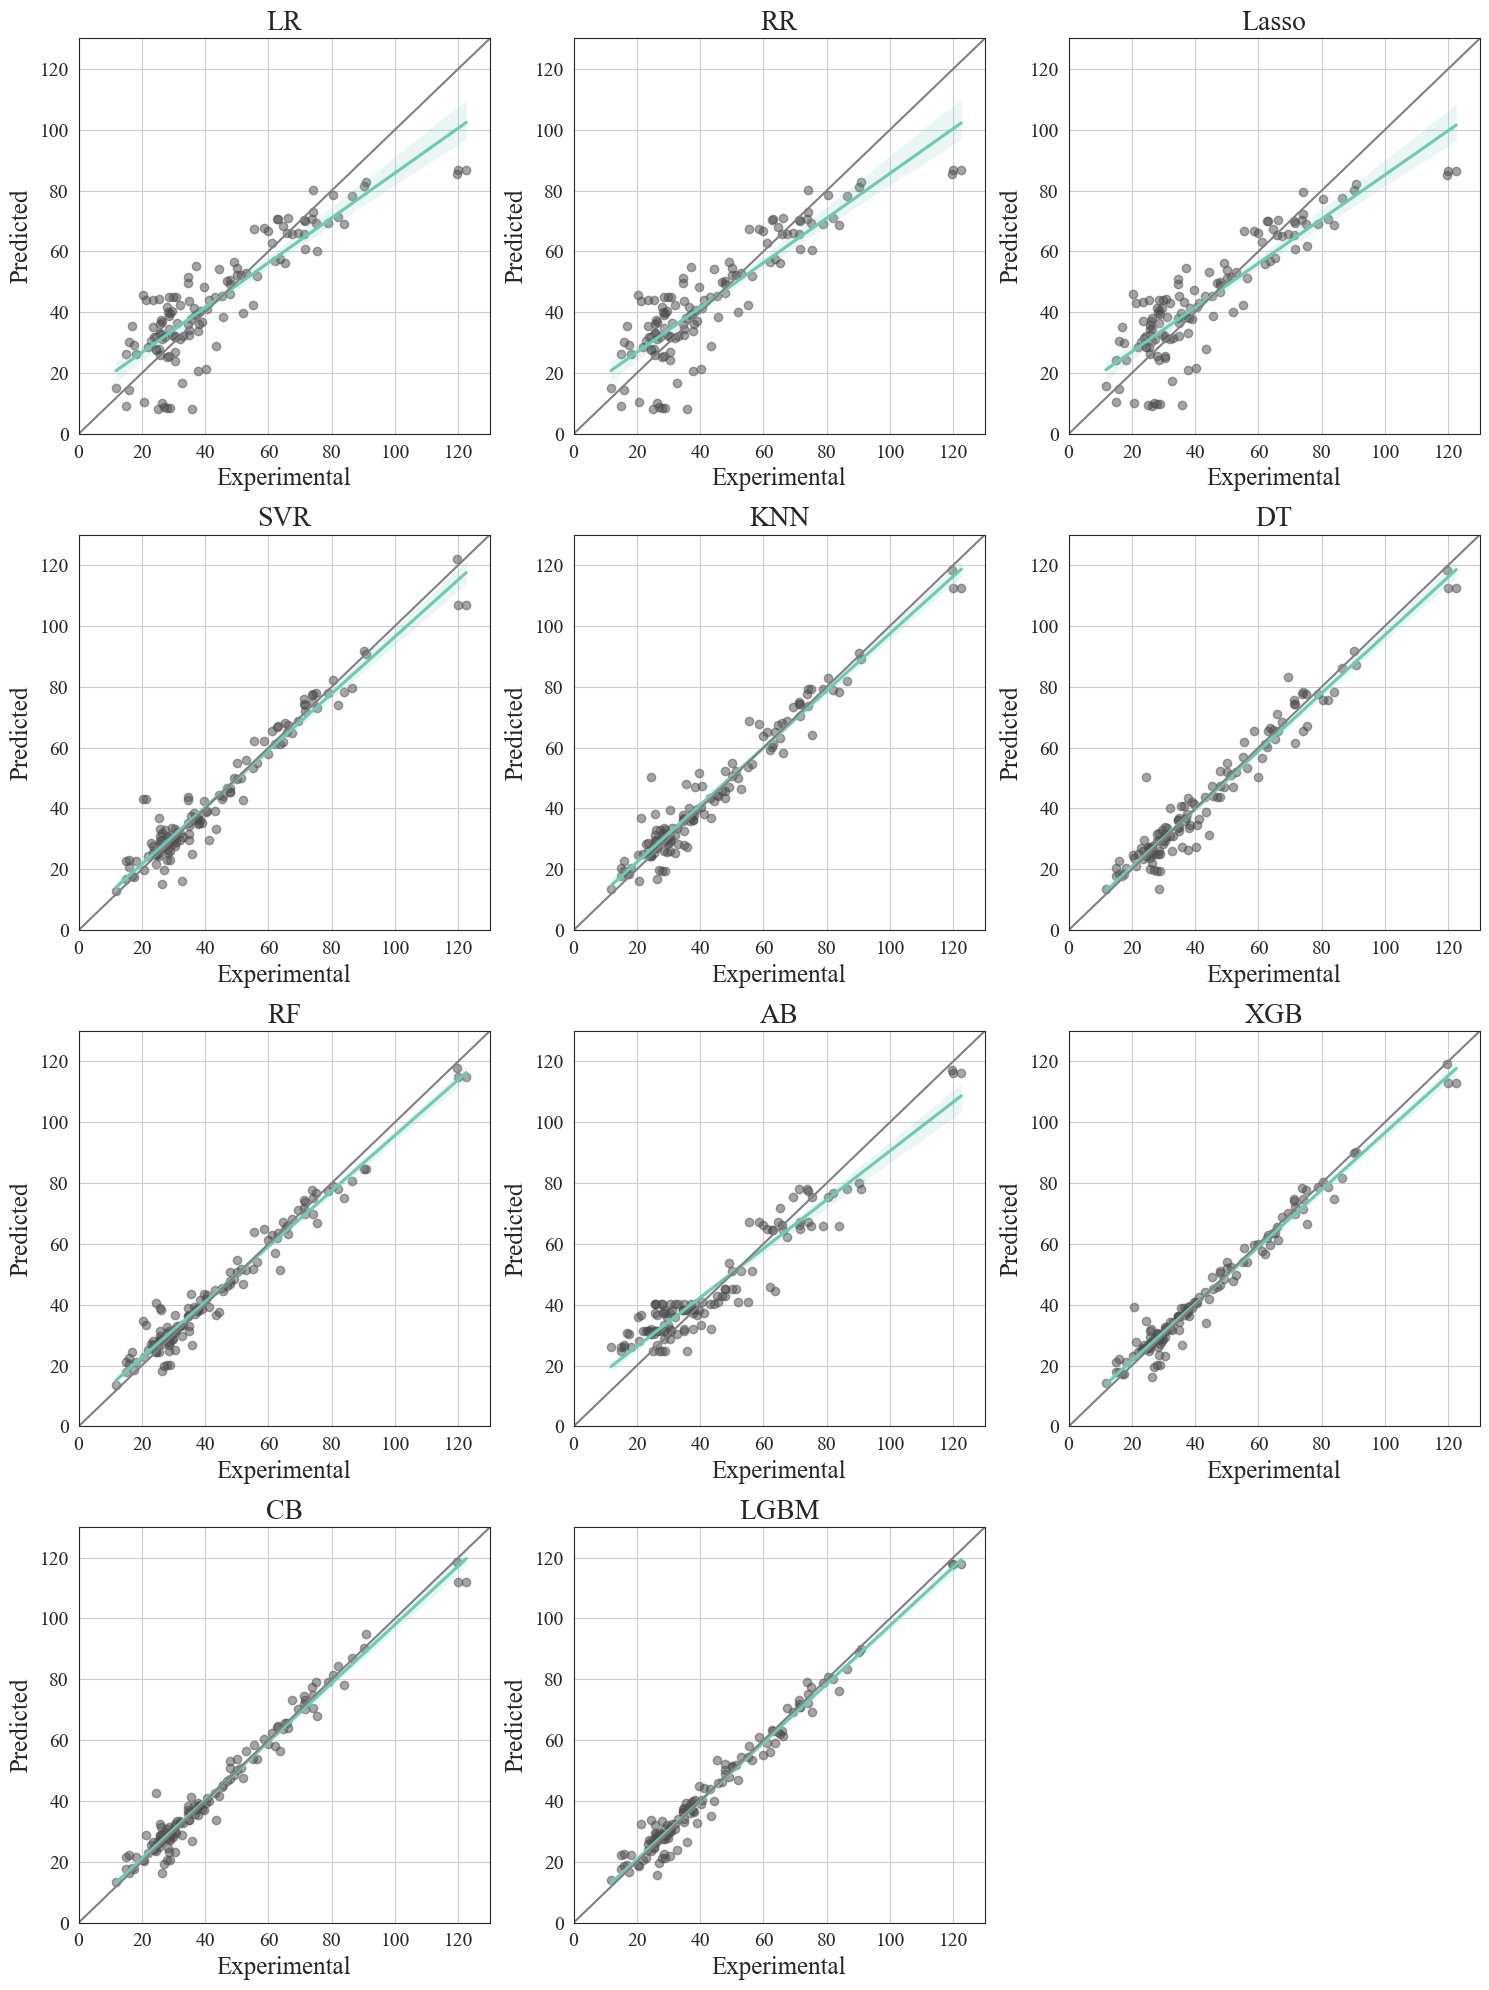

In [201]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Original test set
y_test = np.array(y_test)

# Number of models
num_models = len(predicted_models)

# Calculate the number of rows needed for 3 columns
num_cols = 3
num_rows = (num_models + num_cols - 1) // num_cols  # Ceiling division to get the number of rows

# Set up the figure and axes for subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5 * num_rows))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Plot experimental vs. predicted for each model
for i, (model_name, predictions) in enumerate(predicted_models.items()):
    ax = axes[i]
    # Scatter plot
    ax.scatter(y_test, predictions, alpha=0.5, color='0.3')

    # Add a trend line using sns.regplot
    sns.regplot(x=y_test, y=predictions, ax=ax, scatter=False, color='#6fc9b7')
    
    # Add a reference line from (0, 0) to (120, 120)
    ax.axline((0, 0), slope=1, color='gray', linestyle='-')

    # Set limits for x and y axes
    ax.set_xlim(0, 130)
    ax.set_ylim(0, 130)

       # Set titles and labels
    ax.set_title(model_name, fontsize=20)
    ax.set_xlabel('Experimental', fontsize=18)
    ax.set_ylabel('Predicted', fontsize=18)

    # Set tick font size
    ax.tick_params(axis='both', which='major', labelsize=14)
    
    ax.grid(True)

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
#lt.show()

plt.savefig('ex_vs_red-fnal.png',dpi=1000)

### Feature importance

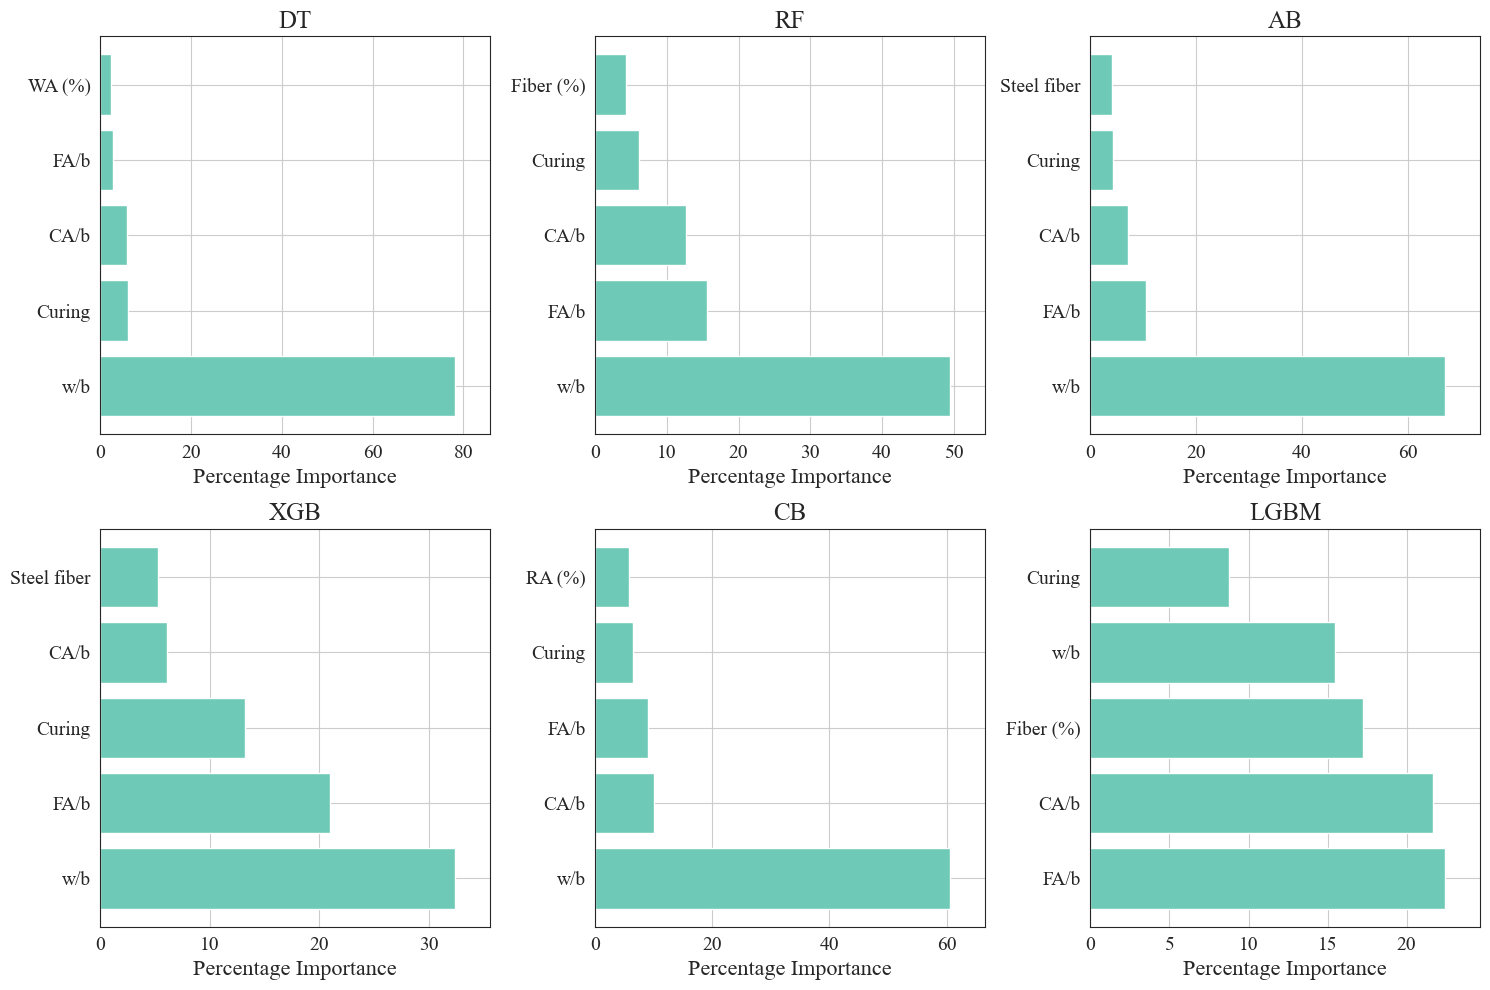

In [214]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Define the feature name mapping
feature_name_mapping = {
    'Fiber Type_No fiber': 'No fiber',
    'Fiber Type_Steel': 'Steel fiber',
    'Fiber Type_Nylon': 'Nylon fiber',
    'Fiber Type_Nylon and Jute': 'Nylon and Jute',
    'Fiber Type_Pineapple': 'Pineapple fiber',
    'Fiber Type_Polypropylene': 'PP fiber',
    'Fiber Type_Sisal': 'Sisal fiber',
    'Fiber Type_Steel and Polypropylene': 'Steel and PP'
}

# Map the original feature names to the desired names
def map_feature_names(feature_names):
    return [feature_name_mapping.get(name, name) for name in feature_names]

# Assuming df is your original DataFrame
original_feature_names = df.drop('CS (MPa)', axis=1).columns.tolist()
mapped_feature_names = map_feature_names(original_feature_names)

# Extract feature importances for each model
def get_feature_importance(grid_search):
    try:
        importances = grid_search.best_estimator_.feature_importances_
        return importances / np.sum(importances) * 100  # Normalize to percentages
    except AttributeError:
        return np.zeros(len(mapped_feature_names))  # If model doesn't support feature_importances_

# Initialize lists to hold feature importances and model names
feature_importances = []
model_names = []

for model_name, grid in models_grid.items():
    importance = get_feature_importance(grid)
    if importance.any():  # Only add models that have feature importances
        feature_importances.append(importance)
        model_names.append(model_name)

# Plotting
fig, axes = plt.subplots(nrows=(len(feature_importances) + 2) // 3, ncols=3, figsize=(15, (len(feature_importances) + 2) // 3 * 5))
axes = axes.flatten()

for idx, (importance, name) in enumerate(zip(feature_importances, model_names)):
    ax = axes[idx]
    # Get top 5 feature importances
    if len(importance) > 5:
        indices = np.argsort(importance)[::-1][:5]
    else:
        indices = np.argsort(importance)[::-1]
    
    top_importance = importance[indices]
    top_features = np.array(mapped_feature_names)[indices]
    
    ax.barh(top_features, top_importance, align='center', color = '#6fc9b7')
    ax.set_title(f'{name}', fontsize=18)
    ax.set_xlabel('Percentage Importance', fontsize=16)
    #ax.set_ylabel('Features', fontsize=12)
    ax.tick_params(axis='x', labelsize=14)
    ax.tick_params(axis='y', labelsize=14)
    ax.set_xlim(0, max(top_importance) * 1.1)
    ax.grid(True)

# Hide any unused subplots
for j in range(idx + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
#plt.show()

plt.savefig('feature_importance-final.png',dpi=1000)

### KDE Plot

C:\Users\mhrab\anaconda3\envs\MLprojects\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\mhrab\anaconda3\envs\MLprojects\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\mhrab\anaconda3\envs\MLprojects\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\mhrab\anaconda3\envs\MLprojects\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed

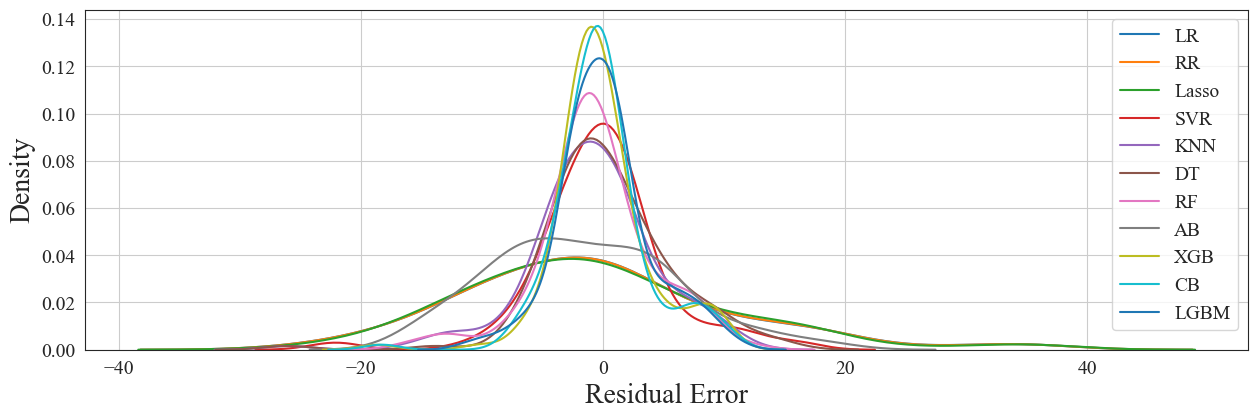

In [180]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the plot
plt.figure(figsize=(15, 5))
plt.subplots_adjust(bottom=0.2)  # Increase bottom margin to prevent overlap

# Use a color palette for distinguishable colors
colors = sns.color_palette("tab10", n_colors=len(residuals))

# Iterate over the residuals dictionary and plot KDE for each model
for (model_name, model_residuals), color in zip(residuals.items(), colors):
    sns.kdeplot(model_residuals, label=model_name, color=color)

# Adding plot details
plt.xlabel('Residual Error', fontsize=20)
plt.ylabel('Density', fontsize=20)

# Set tick font size
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# Position the legend horizontally under the x-axis
plt.legend(fontsize=14, loc='upper right', ncol=1)

plt.grid(True)

# Show the plot
plt.show()


### Box Plot

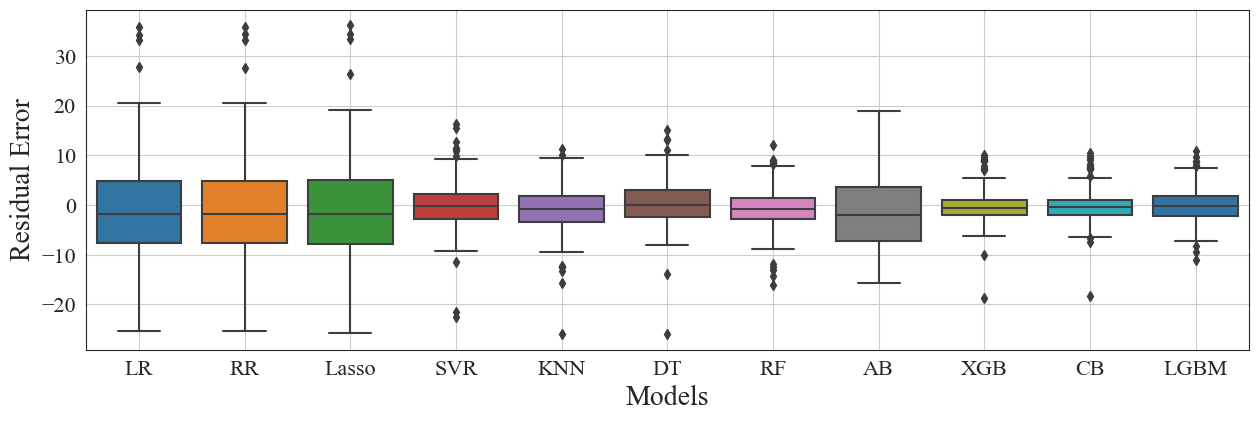

In [181]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Prepare data for the box plot
data = []
for model_name, model_residuals in residuals.items():
    data.append({'Model': model_name, 'Residual': model_residuals})

# Convert data to a DataFrame
import pandas as pd
df_boxplot = pd.DataFrame([{'Model': model_name, 'Residual': res} for model_name, res_list in residuals.items() for res in res_list])

# Set up the plot with adjusted bottom margin
plt.figure(figsize=(15, 5))
plt.subplots_adjust(bottom=0.2)  # Increase bottom margin to prevent overlap

# Create the box plot
sns.boxplot(x='Model', y='Residual', data=df_boxplot, palette='tab10')

# Adding plot details
plt.xlabel('Models', fontsize=20)
plt.ylabel('Residual Error', fontsize=20)

# Set tick font size
plt.xticks(fontsize=16, rotation=0)  # Rotate x-axis labels if needed for better readability
plt.yticks(fontsize=16)

plt.grid(True)

# Show the plot
#plt.show()

plt.savefig('boxplot-final.png', dpi=600)

### Slope, R, std_error calculation from experimental vs prediction values

In [231]:
import pandas as pd
import numpy as np
from scipy import stats

# Function to calculate slope, correlation coefficient, standard error, and p-value
def calculate_metrics(y_true, y_pred):
    # Perform linear regression
    slope, intercept, r_value, p_value, std_err = stats.linregress(y_true, y_pred)
    
    # Correlation coefficient (r)
    correlation_coefficient = r_value
    
    # Standard Error (SE)
    standard_error = std_err
    
    # P-value
    return slope, correlation_coefficient, standard_error, p_value

# List to store results
results = []

# Loop through each model's predictions and calculate metrics
for model, y_pred in predicted_models.items():
    slope, correlation_coefficient, standard_error, p_value = calculate_metrics(y_test, y_pred)
    results.append([model, slope, correlation_coefficient, standard_error, p_value])

# Convert results into a pandas DataFrame
metrics_df = pd.DataFrame(results, columns=['Model', 'Slope', 'Correlation Coefficient', 'Standard Error', 'P-value'])

# Display the DataFrame
metrics_df


,Model,Slope,Correlation Coefficient,Standard Error,P-value
0,LR,0.737317,0.867482,0.037818,1.020740e-39
1,RR,0.735243,0.867870,0.037644,8.604847e-40
2,Lasso,0.726413,0.870596,0.036718,2.554207e-40
3,SVR,0.934640,0.971334,0.020459,7.469691e-80
4,KNN,0.939716,0.971850,0.020376,2.437319e-80
5,DT,0.953992,0.972481,0.020442,6.021753e-81
6,RF,0.913510,0.979332,0.016875,1.259208e-88
7,AB,0.803594,0.949530,0.023744,8.609068e-65
8,XGB,0.937417,0.985250,0.014562,1.051167e-97
9,CB,0.962245,0.985305,0.014919,8.331807e-98


In [232]:
metrics_df.to_excel('statistical score-final.xlsx')

### End